# Tensorflow playground with code

Remember when we played witht the tensorflow playground? Well let's do a quick exercise in order to recreate these examples but with code!

## Circle Problem

* 1️⃣ import `make_circles` from sklearn and create an object data containing circle data of 1000 observations, with some noise and a factor of your choice.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torchviz import make_dot

# Generate circular data
X_data, y_data = make_circles()

# Convert to PyTorch tensors
X = torch.tensor(X_data, dtype=torch.float32)
y = torch.tensor(y_data, dtype=torch.long)

* 2️⃣ Visualize the data

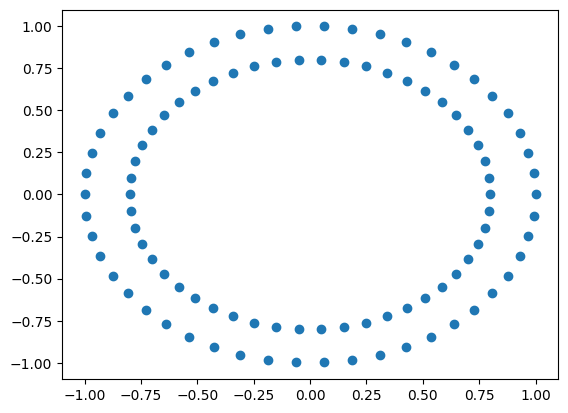

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1])

* 3️⃣ Split them in train and validation set with sklearn
* 4️⃣ Form two batch datasets, one for training data, one for validation data

In [10]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Create DataLoader for batches
train_dataset = data.TensorDataset(X_train, y_train)
val_dataset = data.TensorDataset(X_val, y_val)

train_loader = data.DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=4, shuffle=True)


* 5️⃣ Create a neural network model in order to make predictions on this dataset, try and make it as simple as possible.

In [11]:
class SimpleNN(nn.Module):

    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))

model = SimpleNN()
model

SimpleNN(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# Create a dummy input tensor
dummy_input = torch.randn(10, 2)

# Get the model output
output = model(dummy_input)

# Create and display the computational graph
make_dot(output, params=dict(model.named_parameters())).render("model_architecture", format="png")


'model_architecture.png'

* 6️⃣ Compile the model using Adam and a loss function that suits our problem.

In [10]:
  # Binary Cross Entropy Loss


* 7️⃣ Train the model over 100 epochs

In [11]:
import torch

def train(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    """
    Function to train a PyTorch model with training and validation datasets.
    
    Parameters:
    model: The neural network model to train.
    train_loader: DataLoader for the training dataset.
    val_loader: DataLoader for the validation dataset.
    criterion: Loss function (e.g., Binary Cross Entropy for classification).
    optimizer: Optimization algorithm (e.g., Adam, SGD).
    epochs: Number of training epochs (default=100).
    
    Returns:
    history: Dictionary containing loss and accuracy for both training and validation.
    """
    
    # Dictionary to store training & validation loss and accuracy over epochs
    
    for epoch in range(epochs):  # Loop over the number of epochs
        model.train()  # Set model to training mode
        # Initialize total loss and correct predictions
        
        # Training loop
        # Reset gradients before each batch
        # Forward pass
        # Compute loss
        # Backpropagation (compute gradients)
        # Update model parameters
        # Accumulate batch loss
        # Count correct predictions
        
        # Compute average loss and accuracy for training
        
        # Validation phase (without gradient computation)
        model.eval()  # Set model to evaluation mode
        # No need to compute gradients during validation
        # Forward pass
        # Compute loss
        # Accumulate validation loss
        # Count correct predictions
        
        # Compute average loss and accuracy for validation
        
        # Store metrics in history dictionary
        
        # Print training progress
    
    return history  # Return training history

# Train the model


Epoch [1/100], Loss: 0.6824, Acc: 0.5387, Val Loss: 0.6648, Val Acc: 0.5600
Epoch [2/100], Loss: 0.6451, Acc: 0.5675, Val Loss: 0.6467, Val Acc: 0.5800
Epoch [3/100], Loss: 0.6188, Acc: 0.6388, Val Loss: 0.6133, Val Acc: 0.7250
Epoch [4/100], Loss: 0.6005, Acc: 0.7125, Val Loss: 0.6094, Val Acc: 0.6900
Epoch [5/100], Loss: 0.5797, Acc: 0.7388, Val Loss: 0.5892, Val Acc: 0.7500
Epoch [6/100], Loss: 0.5640, Acc: 0.7612, Val Loss: 0.5710, Val Acc: 0.7650
Epoch [7/100], Loss: 0.5575, Acc: 0.7462, Val Loss: 0.5569, Val Acc: 0.7500
Epoch [8/100], Loss: 0.5474, Acc: 0.7550, Val Loss: 0.5560, Val Acc: 0.7400
Epoch [9/100], Loss: 0.5438, Acc: 0.7375, Val Loss: 0.5574, Val Acc: 0.6850
Epoch [10/100], Loss: 0.5366, Acc: 0.7500, Val Loss: 0.5482, Val Acc: 0.7250
Epoch [11/100], Loss: 0.5350, Acc: 0.7338, Val Loss: 0.5482, Val Acc: 0.7650
Epoch [12/100], Loss: 0.5337, Acc: 0.7275, Val Loss: 0.5485, Val Acc: 0.7600
Epoch [13/100], Loss: 0.5309, Acc: 0.7275, Val Loss: 0.5420, Val Acc: 0.7000
Epoch [1

* 8️⃣ Plot the evolution of the train loss and the validation loss and the evolution of the train metric and the validation metric.

* 9️⃣ Did the model overfit ?

No it seemed rather that the model underfit! We should increase the learning rate or the number of neurons on our layers.

* 🔟 Can you try and plot the decision function of the model in the data space? Like we saw in the tensorflow playground? You can get inspiration <a href="https://plotly.com/python/knn-classification/"> here </a>

## Spiral problem

* 1️⃣ Use the following code to produce some spiral data:

In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt

N = 1000
theta = np.sqrt(np.random.rand(N)) * 4 * np.pi

r_a = 2 * theta + np.pi
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
x_a = data_a + np.random.randn(N, 2)
x_a = x_a / np.abs(x_a).max()

r_b = -2 * theta - np.pi
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T
x_b = data_b + np.random.randn(N, 2)
x_b = x_b / np.abs(x_b).max()

res_a = np.append(x_a, np.zeros((N, 1)), axis=1)
res_b = np.append(x_b, np.ones((N, 1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

data = torch.tensor(res[:, 0:2], dtype=torch.float32)
target = torch.tensor(res[:, -1], dtype=torch.long)

* 2️⃣ Split into train and validation set

* 3️⃣ Form a train and validation batch dataset

[tensor([[-0.1847, -0.6114],
         [-0.7072, -0.3576],
         [ 0.5627, -0.4050],
         [ 0.5692,  0.0854],
         [ 0.0672, -0.8922],
         [-0.0662,  0.7808],
         [ 0.3592,  0.5502],
         [ 0.4210,  0.3546]]),
 tensor([1, 0, 1, 0, 0, 1, 0, 0])]

* 4️⃣ Create a neural network model that can acheive good predictions on the train set (for now we do not care about overfitting)

* 5️⃣ Compile the model with the right loss and metric and Adam optimizer

* 6️⃣ Train the model over 100 epochs

In [23]:
import torch

def train(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    """
    Function to train a PyTorch model with training and validation datasets.
    
    Parameters:
    model: The neural network model to train.
    train_loader: DataLoader for the training dataset.
    val_loader: DataLoader for the validation dataset.
    criterion: Loss function (e.g., Binary Cross Entropy for classification).
    optimizer: Optimization algorithm (e.g., Adam, SGD).
    epochs: Number of training epochs (default=100).
    
    Returns:
    history: Dictionary containing loss and accuracy for both training and validation.
    """
    
    # Dictionary to store training & validation loss and accuracy over epochs
    
    for epoch in range(epochs):  # Loop over the number of epochs
        model.train()  # Set model to training mode
        # Initialize total loss and correct predictions
        
        # Training loop
        # Reset gradients before each batch
        # Forward pass
        # Compute loss
        # Backpropagation (compute gradients)
        # Update model parameters
        # Accumulate batch loss
        # Count correct predictions
        
        # Compute average loss and accuracy for training
        
        # Validation phase (without gradient computation)
        model.eval()  # Set model to evaluation mode
        # No need to compute gradients during validation
        # Forward pass
        # Compute loss
        # Accumulate validation loss
        # Count correct predictions
        
        # Compute average loss and accuracy for validation
        
        # Store metrics in history dictionary
        
        # Print training progress
    
    return history  # Return training history

# Train the model


Epoch [1/100], Loss: 0.6430, Acc: 0.6344, Val Loss: 0.6474, Val Acc: 0.5975
Epoch [2/100], Loss: 0.6030, Acc: 0.6294, Val Loss: 0.5924, Val Acc: 0.6125
Epoch [3/100], Loss: 0.5130, Acc: 0.6575, Val Loss: 0.4464, Val Acc: 0.7375
Epoch [4/100], Loss: 0.4213, Acc: 0.7456, Val Loss: 0.3919, Val Acc: 0.8450
Epoch [5/100], Loss: 0.3721, Acc: 0.8031, Val Loss: 0.3382, Val Acc: 0.8625
Epoch [6/100], Loss: 0.3322, Acc: 0.8287, Val Loss: 0.3082, Val Acc: 0.8525
Epoch [7/100], Loss: 0.3102, Acc: 0.8425, Val Loss: 0.2783, Val Acc: 0.8675
Epoch [8/100], Loss: 0.3051, Acc: 0.8450, Val Loss: 0.2747, Val Acc: 0.8700
Epoch [9/100], Loss: 0.2939, Acc: 0.8550, Val Loss: 0.2749, Val Acc: 0.8600
Epoch [10/100], Loss: 0.2802, Acc: 0.8588, Val Loss: 0.2681, Val Acc: 0.8725
Epoch [11/100], Loss: 0.3178, Acc: 0.8356, Val Loss: 0.2717, Val Acc: 0.8650
Epoch [12/100], Loss: 0.2968, Acc: 0.8525, Val Loss: 0.2526, Val Acc: 0.8700
Epoch [13/100], Loss: 0.2861, Acc: 0.8538, Val Loss: 0.2635, Val Acc: 0.8625
Epoch [1

* 7️⃣ Is the model overfitting? Use visualization

* 8️⃣ Visualize the decision boundary, would you say the model could benefit from some regularization?

* 9️⃣ Create a new model and add regularization to each layer, train it and visualize the decision boundary

In [26]:

         # layer for regularization

    

# add regularizatio in the optimizer


Epoch [1/500], Loss: 0.6414, Acc: 0.6250, Val Loss: 0.6542, Val Acc: 0.5825
Epoch [2/500], Loss: 0.6109, Acc: 0.6325, Val Loss: 0.5982, Val Acc: 0.5825
Epoch [3/500], Loss: 0.5692, Acc: 0.6269, Val Loss: 0.5706, Val Acc: 0.6800
Epoch [4/500], Loss: 0.4950, Acc: 0.6681, Val Loss: 0.4525, Val Acc: 0.7300
Epoch [5/500], Loss: 0.4326, Acc: 0.7412, Val Loss: 0.3973, Val Acc: 0.8225
Epoch [6/500], Loss: 0.3657, Acc: 0.7956, Val Loss: 0.3007, Val Acc: 0.8375
Epoch [7/500], Loss: 0.3305, Acc: 0.8219, Val Loss: 0.2829, Val Acc: 0.8500
Epoch [8/500], Loss: 0.2718, Acc: 0.8956, Val Loss: 0.2626, Val Acc: 0.8825
Epoch [9/500], Loss: 0.2282, Acc: 0.9137, Val Loss: 0.2165, Val Acc: 0.9225
Epoch [10/500], Loss: 0.2069, Acc: 0.9250, Val Loss: 0.1953, Val Acc: 0.9125
Epoch [11/500], Loss: 0.2051, Acc: 0.9200, Val Loss: 0.2022, Val Acc: 0.9200
Epoch [12/500], Loss: 0.1974, Acc: 0.9200, Val Loss: 0.2950, Val Acc: 0.8575
Epoch [13/500], Loss: 0.1870, Acc: 0.9263, Val Loss: 0.1952, Val Acc: 0.9150
Epoch [1

{'loss': [0.641367733925581,
  0.6109050568938256,
  0.5692092801630497,
  0.4950239850580692,
  0.4326471184194088,
  0.3656971966475248,
  0.3304543465282768,
  0.27183983001858,
  0.22815633919090034,
  0.20686031507328154,
  0.2050925931800157,
  0.19740567818051205,
  0.1870351563487202,
  0.17822863919660448,
  0.171480731992051,
  0.19781456675380468,
  0.16689594101160765,
  0.15721915140049533,
  0.1617887343186885,
  0.1454473593411967,
  0.15919868320692332,
  0.14546714607160538,
  0.15319729181937874,
  0.14003952987957746,
  0.1444628615723923,
  0.15538268322125076,
  0.14027630974538624,
  0.14130615547765046,
  0.13549753465224057,
  0.1370177353359759,
  0.1444728891737759,
  0.14763371438952164,
  0.139705893099308,
  0.13355972847901285,
  0.1459333332441747,
  0.13607983013847844,
  0.12556153956335037,
  0.12367708858568222,
  0.14231313503347337,
  0.13545654818415642,
  0.1395986774051562,
  0.1394007903849706,
  0.11542569149285554,
  0.12543719953391702,
  0.1